Problem Statement & Target Variable
🔎 Problem Statement:
"Predict the class/category of a target variable using the features in the dataset."

🎯 Target Variable:
Let’s assume your target column is named something like target, label, status, etc. (If it's different, please confirm the exact column name.)
classification problem, 


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
# Load CSV
df = pd.read_csv(r"C:\Users\ANUSHA\Downloads\archive (2)\popular_street_foods\dataset_stats.csv")

In [9]:
# Show first 5 rows
print(df.head())

        class  image_count  avg_width  avg_height  min_width  min_height  \
0     churros          200        135         127         88          57   
1      gelato          200        145         122         78          55   
2  currywurst          200        142         121         54          63   
3      crepes          200        134         128         93          79   
4     hot_dog          200        143         121         89          54   

   max_width  max_height    formats  corrupt_files  
0        162         140       jpeg              0  
1        162         140  jpeg, png              0  
2        162         140       jpeg              0  
3        162         140       jpeg              0  
4        162         140       jpeg              0  


In [13]:
# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   class          20 non-null     object
 1   image_count    20 non-null     int64 
 2   avg_width      20 non-null     int64 
 3   avg_height     20 non-null     int64 
 4   min_width      20 non-null     int64 
 5   min_height     20 non-null     int64 
 6   max_width      20 non-null     int64 
 7   max_height     20 non-null     int64 
 8   formats        20 non-null     object
 9   corrupt_files  20 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 1.7+ KB
None


In [15]:
# Check nulls
print(df.isnull().sum())

class            0
image_count      0
avg_width        0
avg_height       0
min_width        0
min_height       0
max_width        0
max_height       0
formats          0
corrupt_files    0
dtype: int64


In [17]:
# Summary statistics
print(df.describe())

       image_count   avg_width  avg_height  min_width  min_height  max_width  \
count    20.000000   20.000000   20.000000  20.000000   20.000000       20.0   
mean    185.550000  138.100000  125.100000  82.000000   68.700000      162.0   
std      16.391509    6.356927    4.037978  10.682007   11.220751        0.0   
min     158.000000  129.000000  119.000000  54.000000   50.000000      162.0   
25%     174.750000  133.000000  121.000000  78.000000   62.000000      162.0   
50%     195.500000  137.500000  125.000000  82.500000   68.000000      162.0   
75%     200.000000  144.250000  128.250000  91.250000   77.500000      162.0   
max     200.000000  147.000000  131.000000  93.000000   90.000000      162.0   

       max_height  corrupt_files  
count        20.0           20.0  
mean        140.0            0.0  
std           0.0            0.0  
min         140.0            0.0  
25%         140.0            0.0  
50%         140.0            0.0  
75%         140.0            0.0  

In [27]:
print(df.isnull().sum())


class            0
image_count      0
avg_width        0
avg_height       0
min_width        0
min_height       0
max_width        0
max_height       0
formats          0
corrupt_files    0
dtype: int64


In [25]:
print(df.columns)

Index(['class', 'image_count', 'avg_width', 'avg_height', 'min_width',
       'min_height', 'max_width', 'max_height', 'formats', 'corrupt_files'],
      dtype='object')


class
churros                1
gelato                 1
pad_thai               1
arepas                 1
bánh_mì                1
pizza_slice            1
kebab_(shish_kebab)    1
falafel                1
pretzel                1
empanadas              1
burger                 1
poutine                1
tacos                  1
pani_puri              1
fish_and_chips         1
shawarma               1
hot_dog                1
crepes                 1
currywurst             1
samosas                1
Name: count, dtype: int64


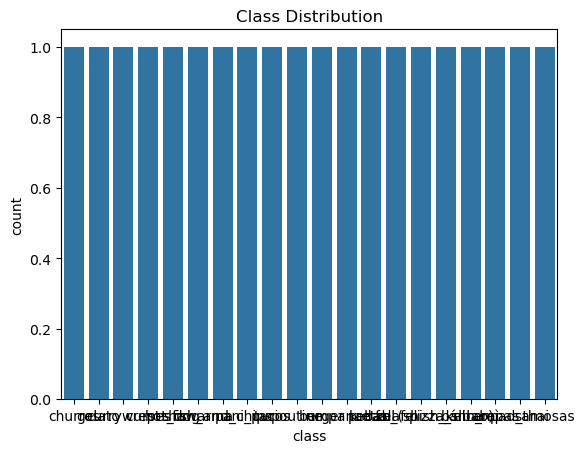

In [31]:
# Class distribution
print(df['class'].value_counts())
sns.countplot(data=df, x='class')
plt.title("Class Distribution")
plt.show()

In [33]:
# Fill missing values if any
df.fillna(df.mode().iloc[0], inplace=True)


In [35]:
# Label encode if 'formats' is categorical
le = LabelEncoder()
df['formats'] = le.fit_transform(df['formats'])


In [43]:
# Features and Target
X = df.drop('class', axis=1)
y = df['class']


In [41]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
#evaluation

In [53]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.0
                     precision    recall  f1-score   support

             arepas       0.00      0.00      0.00       1.0
             burger       0.00      0.00      0.00       0.0
            churros       0.00      0.00      0.00       1.0
             gelato       0.00      0.00      0.00       1.0
            hot_dog       0.00      0.00      0.00       0.0
kebab_(shish_kebab)       0.00      0.00      0.00       0.0
        pizza_slice       0.00      0.00      0.00       1.0
              tacos       0.00      0.00      0.00       0.0

           accuracy                           0.00       4.0
          macro avg       0.00      0.00      0.00       4.0
       weighted avg       0.00      0.00      0.00       4.0



C:\Users\ANUSHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ANUSHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ANUSHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ANUSHA\anaconda3\Lib\site-packages\s

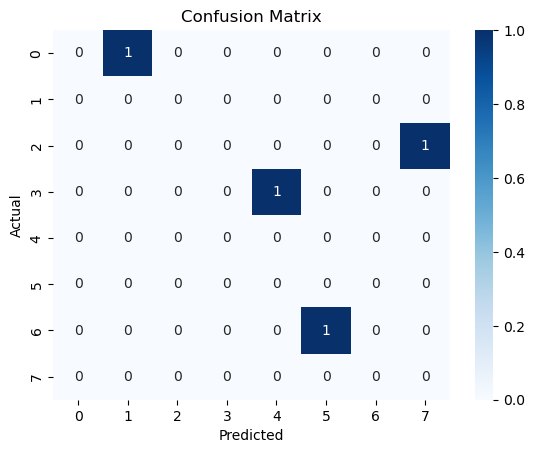

In [55]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

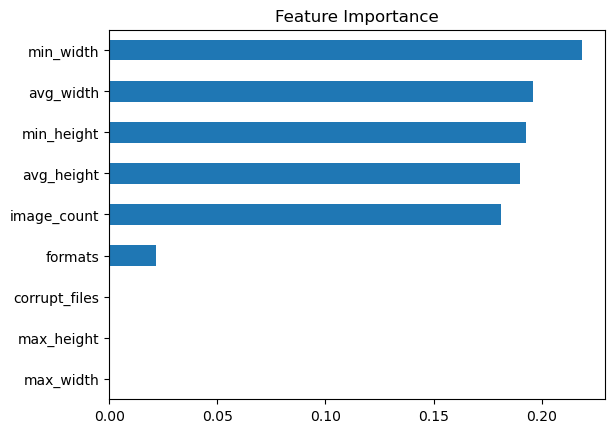

In [57]:
#Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [67]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

for name, m in models.items():
    m.fit(X_train, y_train)
    preds = m.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, preds):.2f}")

Logistic Regression Accuracy: 0.00
Decision Tree Accuracy: 0.00
SVM Accuracy: 0.00


In [69]:
print("Train class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())

Train class distribution:
 class
tacos                  1
shawarma               1
empanadas              1
crepes                 1
pad_thai               1
bánh_mì                1
falafel                1
currywurst             1
poutine                1
samosas                1
hot_dog                1
pretzel                1
pani_puri              1
burger                 1
kebab_(shish_kebab)    1
fish_and_chips         1
Name: count, dtype: int64
Test class distribution:
 class
churros        1
arepas         1
pizza_slice    1
gelato         1
Name: count, dtype: int64


In [73]:
print(df['class'].value_counts())

class
churros                1
gelato                 1
pad_thai               1
arepas                 1
bánh_mì                1
pizza_slice            1
kebab_(shish_kebab)    1
falafel                1
pretzel                1
empanadas              1
burger                 1
poutine                1
tacos                  1
pani_puri              1
fish_and_chips         1
shawarma               1
hot_dog                1
crepes                 1
currywurst             1
samosas                1
Name: count, dtype: int64


In [75]:
# Drop any classes with < 2 samples
class_counts = df['class'].value_counts()
valid_classes = class_counts[class_counts >= 2].index
df = df[df['class'].isin(valid_classes)]

In [81]:
print(df.shape)

(0, 10)


In [83]:
print("Class distribution before filtering:")
print(df['class'].value_counts())

Class distribution before filtering:
Series([], Name: count, dtype: int64)


In [85]:
# Get valid classes
class_counts = df['class'].value_counts()
valid_classes = class_counts[class_counts >= 2].index

In [87]:
# Filter the DataFrame
df = df[df['class'].isin(valid_classes)]

In [89]:
# Show how many rows are left
print("Remaining data shape:", df.shape)

Remaining data shape: (0, 10)


In [91]:
df = pd.read_csv(r"C:\Users\ANUSHA\Downloads\archive (2)\popular_street_foods\dataset_stats.csv")  # update path if needed

In [95]:
# Check class distribution
print(df['class'].value_counts())

class
churros                1
gelato                 1
pad_thai               1
arepas                 1
bánh_mì                1
pizza_slice            1
kebab_(shish_kebab)    1
falafel                1
pretzel                1
empanadas              1
burger                 1
poutine                1
tacos                  1
pani_puri              1
fish_and_chips         1
shawarma               1
hot_dog                1
crepes                 1
currywurst             1
samosas                1
Name: count, dtype: int64


In [97]:
# Keep only classes with 2 or more instances
valid_classes = df['class'].value_counts()
valid_classes = valid_classes[valid_classes >= 2].index
df = df[df['class'].isin(valid_classes)]

In [99]:
# Confirm result
print("Remaining rows after filtering:", df.shape[0])
print("Remaining class distribution:\n", df['class'].value_counts())

Remaining rows after filtering: 0
Remaining class distribution:
 Series([], Name: count, dtype: int64)


In [113]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [117]:
# Step 1: Load CSV
df = pd.read_csv(r"C:\Users\ANUSHA\Downloads\archive (2)\popular_street_foods\dataset_stats.csv")  

In [107]:
# Drop the 'class' column, keep features only
X = df.drop('class', axis=1)


In [136]:
# Step 3: Drop categorical (non-numeric) columns like 'jpeg', 'image', 'filename', etc.
# Keep only numeric columns
X = df.select_dtypes(include=['int64', 'float64'])

In [140]:
# Optional: Print shape and sample to confirm
print("Shape of numeric data:", X.shape)
print(X.head())

Shape of numeric data: (20, 8)
   image_count  avg_width  avg_height  min_width  min_height  max_width  \
0          200        135         127         88          57        162   
1          200        145         122         78          55        162   
2          200        142         121         54          63        162   
3          200        134         128         93          79        162   
4          200        143         121         89          54        162   

   max_height  corrupt_files  
0         140              0  
1         140              0  
2         140              0  
3         140              0  
4         140              0  


In [142]:
# Step 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [144]:
# Step 5: Perform KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)



C:\Users\ANUSHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [146]:
# Step 6: Add cluster labels to original DataFrame
df['Cluster'] = clusters


In [150]:
# Create a DataFrame from scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [174]:
# Join with suffix to avoid column name clash
df_scaled = df.join(X_scaled_df, rsuffix='_scaled')

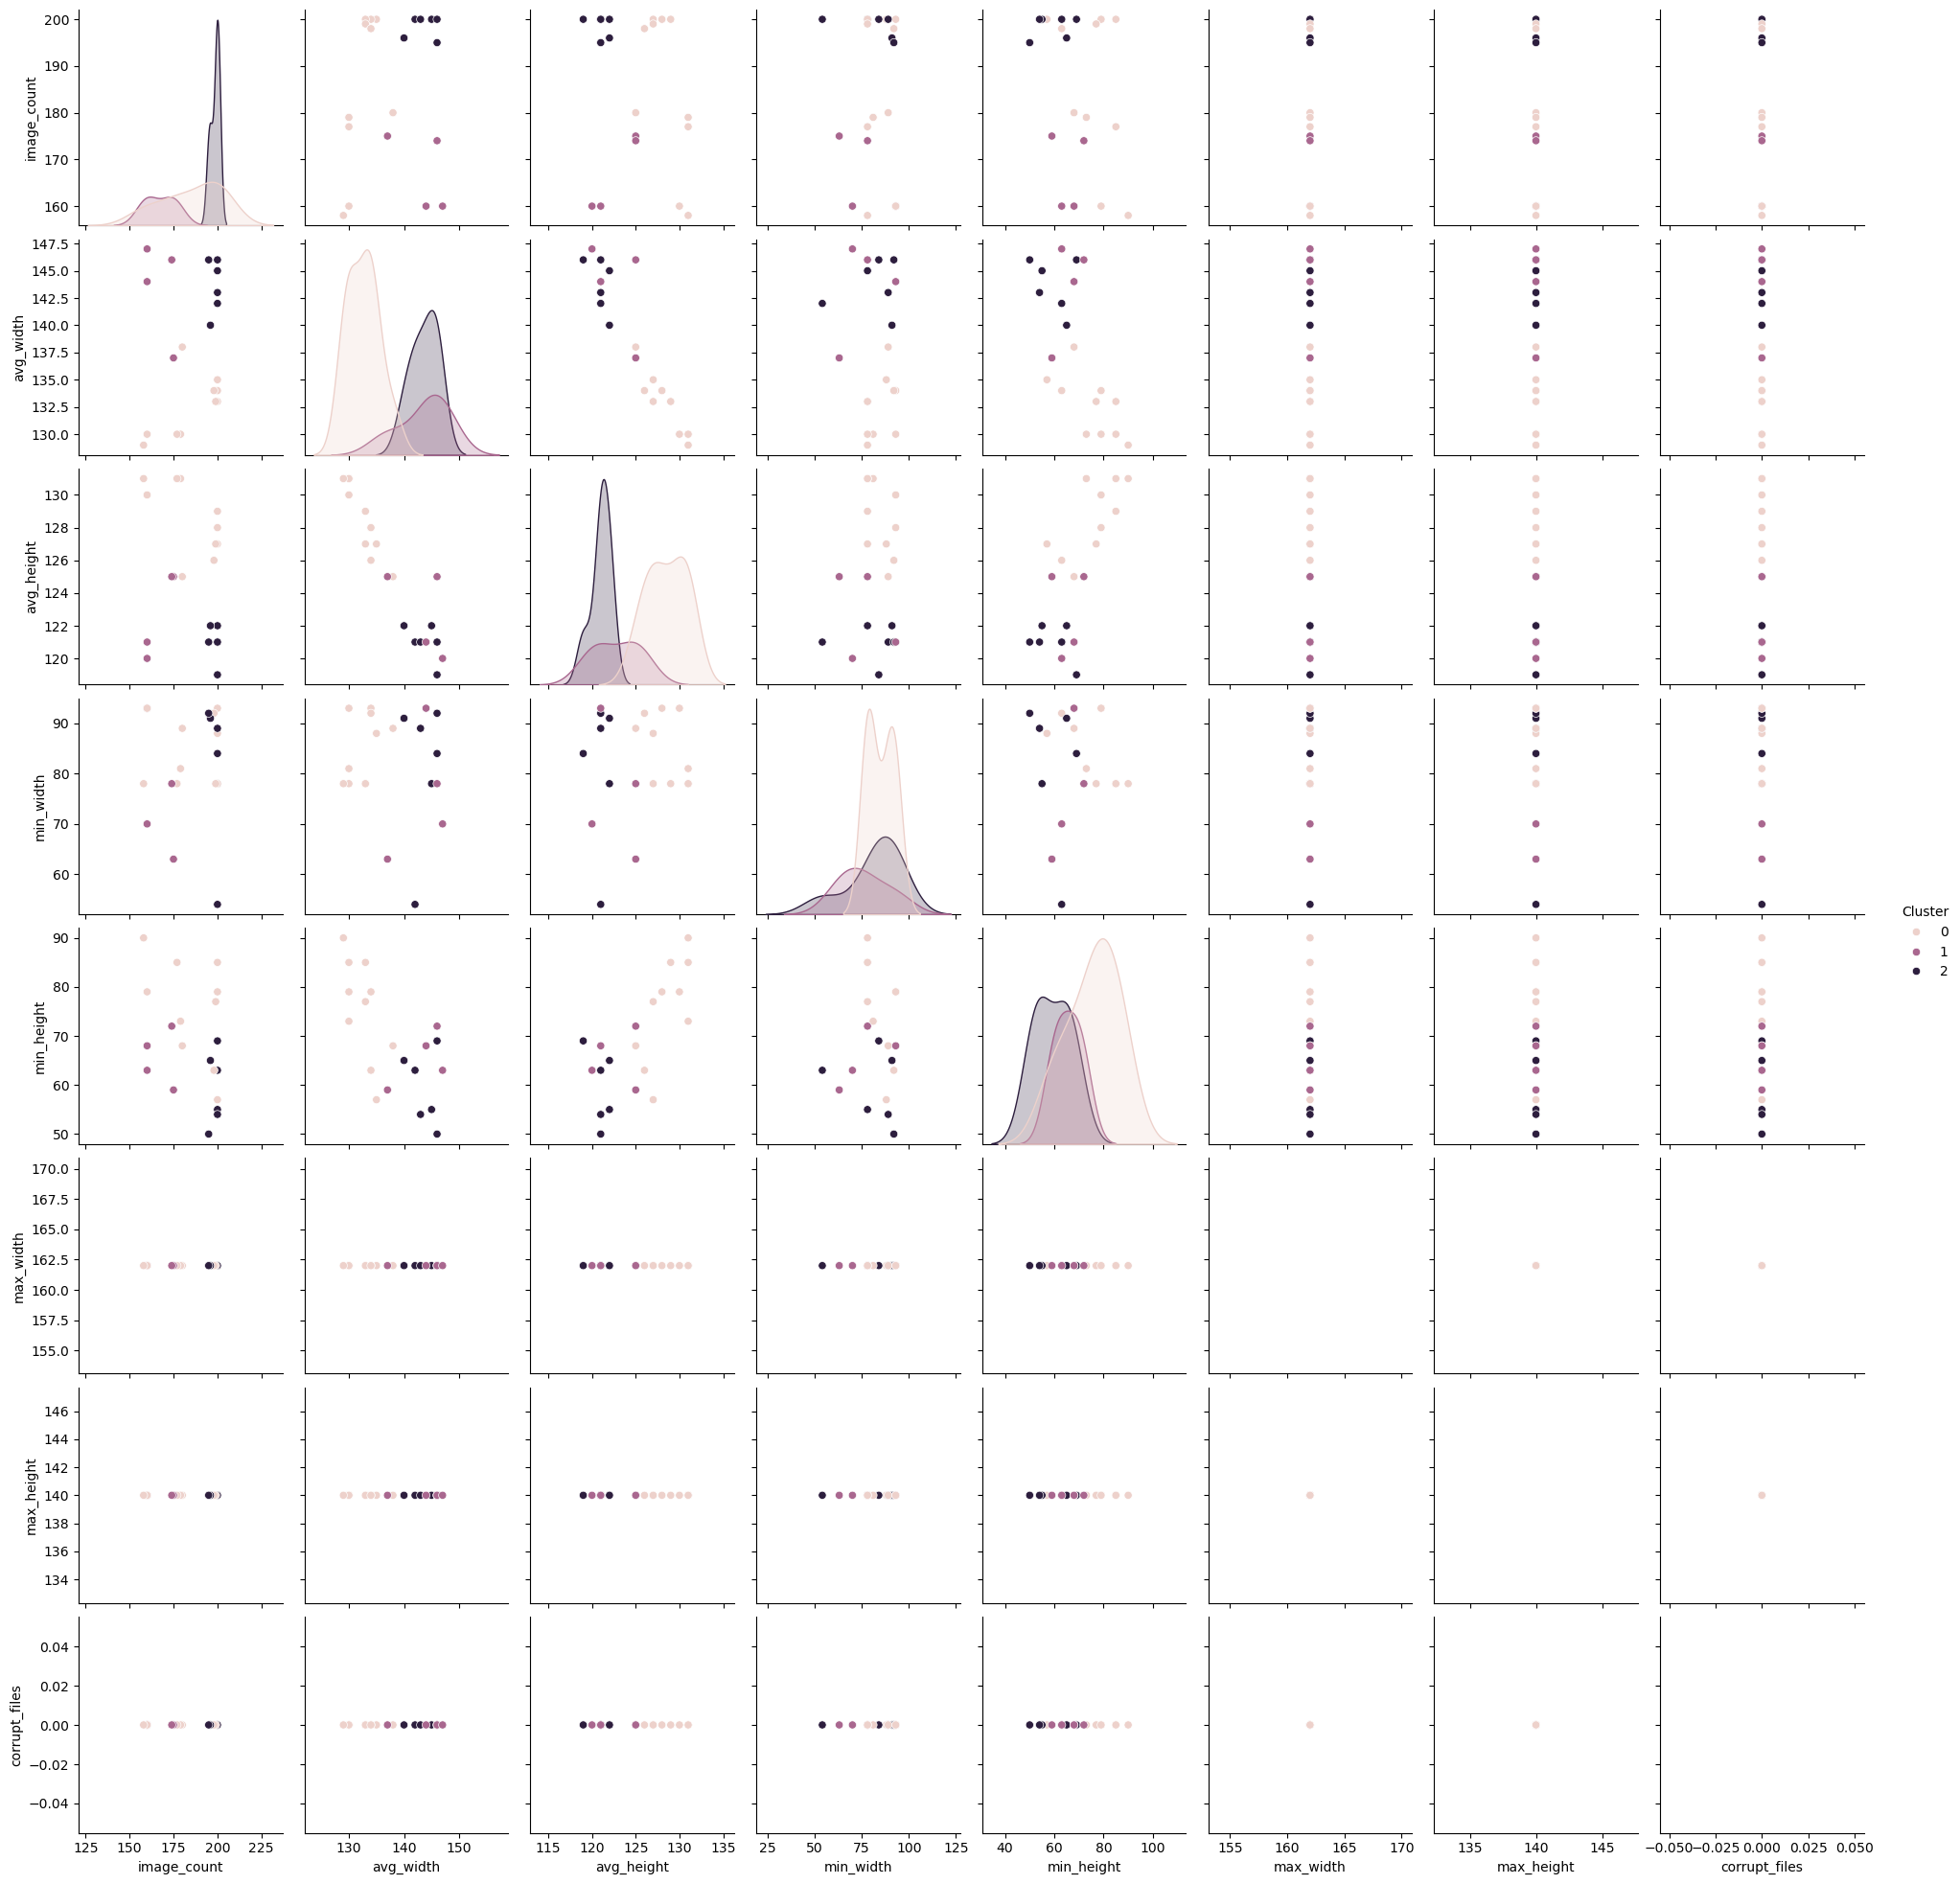

In [176]:
# Plot pairplot using scaled features and cluster labels
sns.pairplot(df_scaled, vars=X.columns, hue='Cluster')
plt.show()

In [152]:
# Concatenate with original df and add cluster labels
df_scaled = pd.concat([df.reset_index(drop=True), X_scaled_df], axis=1)

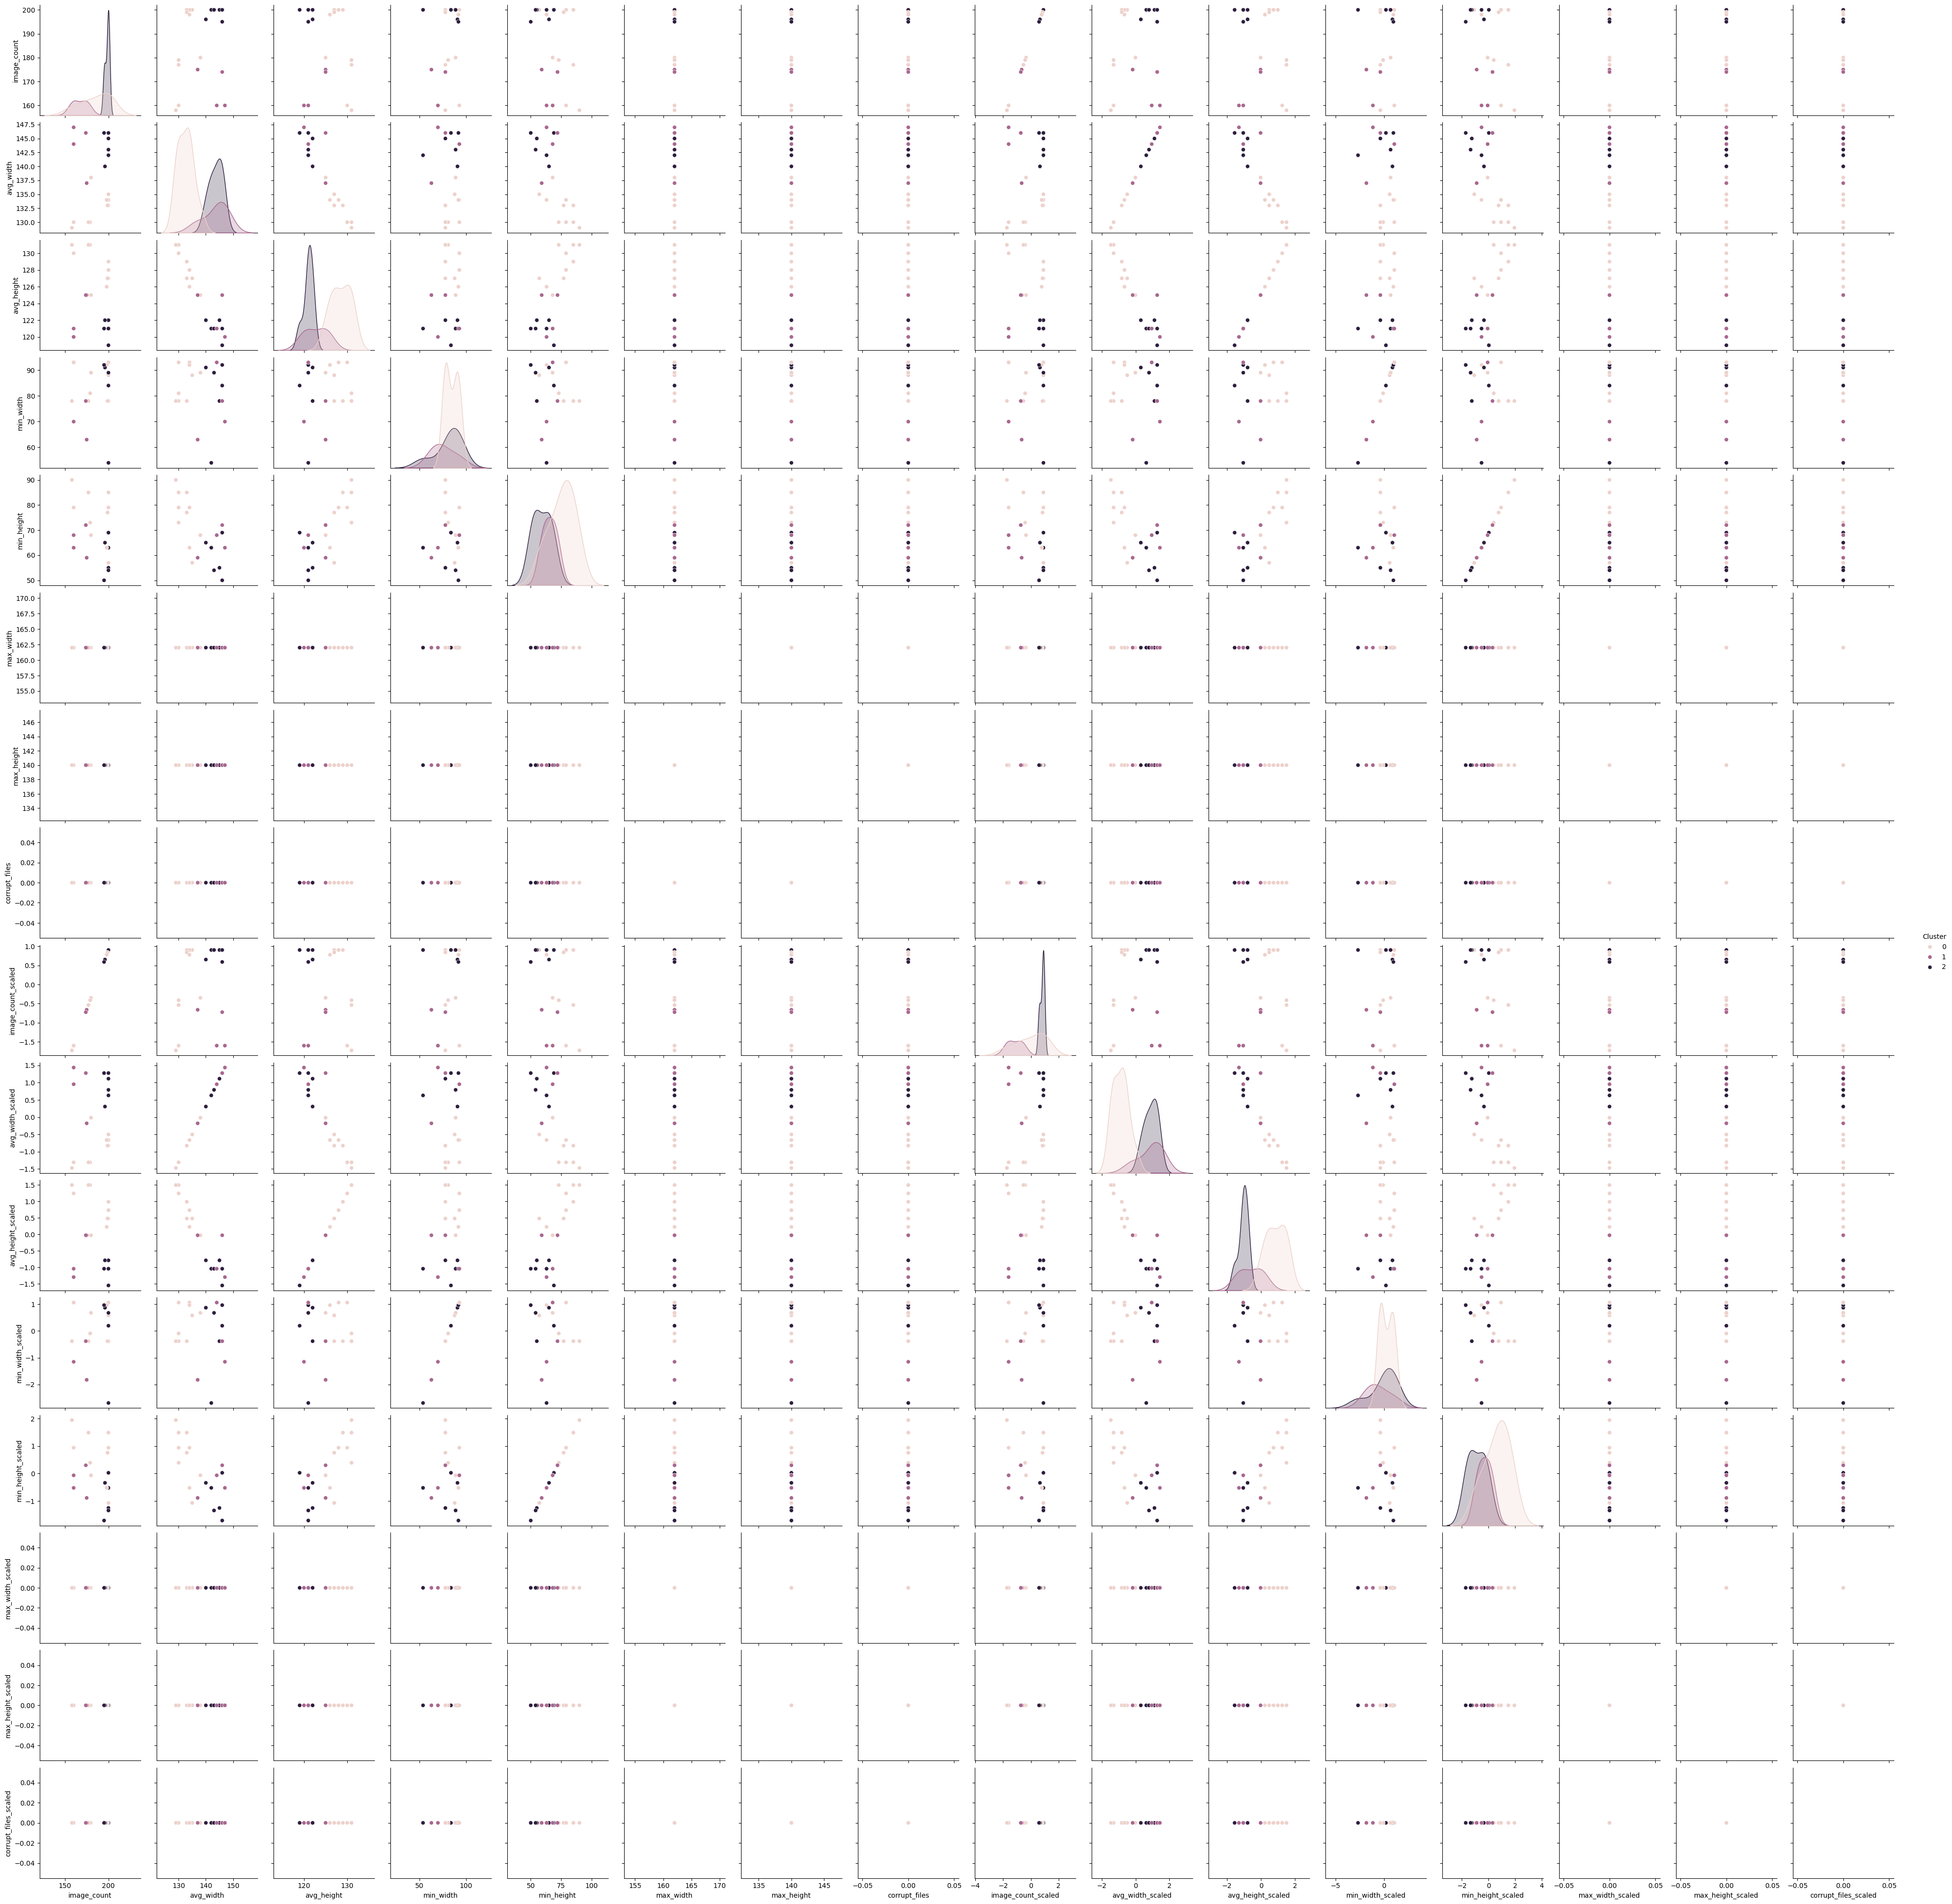

In [178]:
# Visualize with pairplot
sns.pairplot(df_scaled, hue='Cluster')
plt.show()

In [ ]:
#Use .join() with suffixes

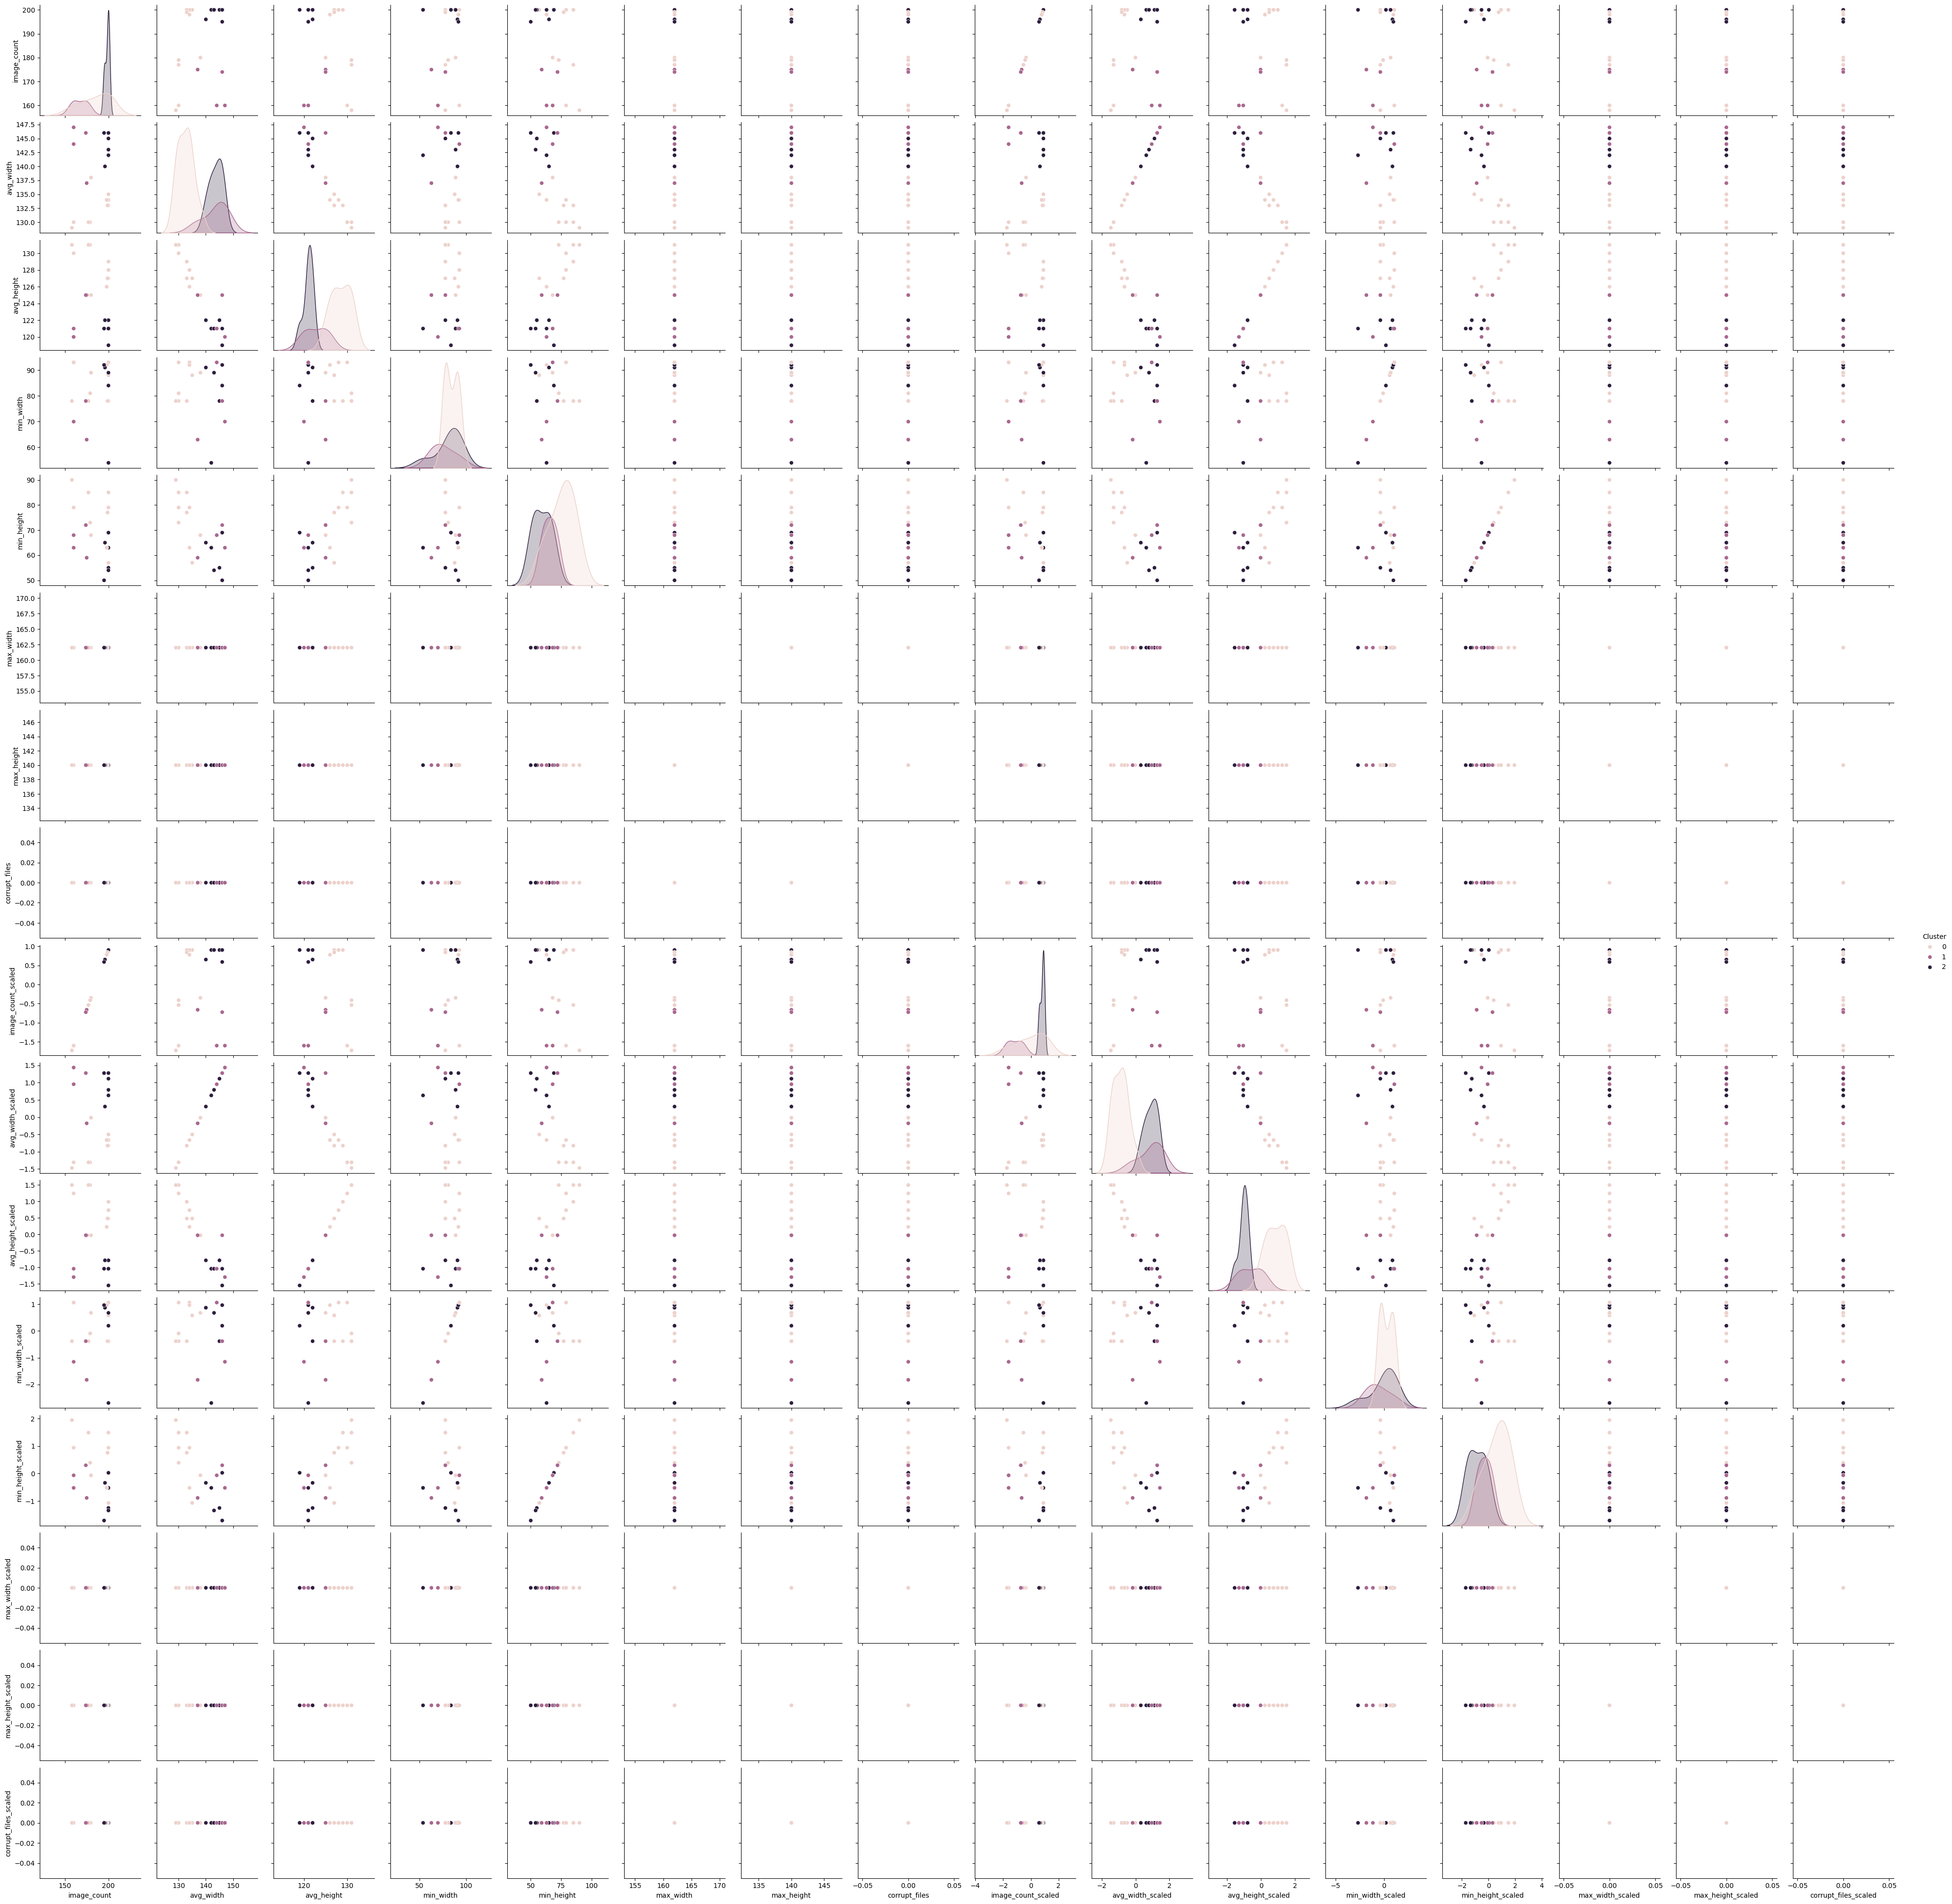

In [156]:
df_scaled = df.join(pd.DataFrame(X_scaled, columns=X.columns), rsuffix='_scaled')
sns.pairplot(df_scaled, hue='Cluster')
plt.show()


In [160]:
# Create DataFrame from scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Join with suffix to avoid column name clash
df_scaled = df.join(X_scaled_df, rsuffix='_scaled')

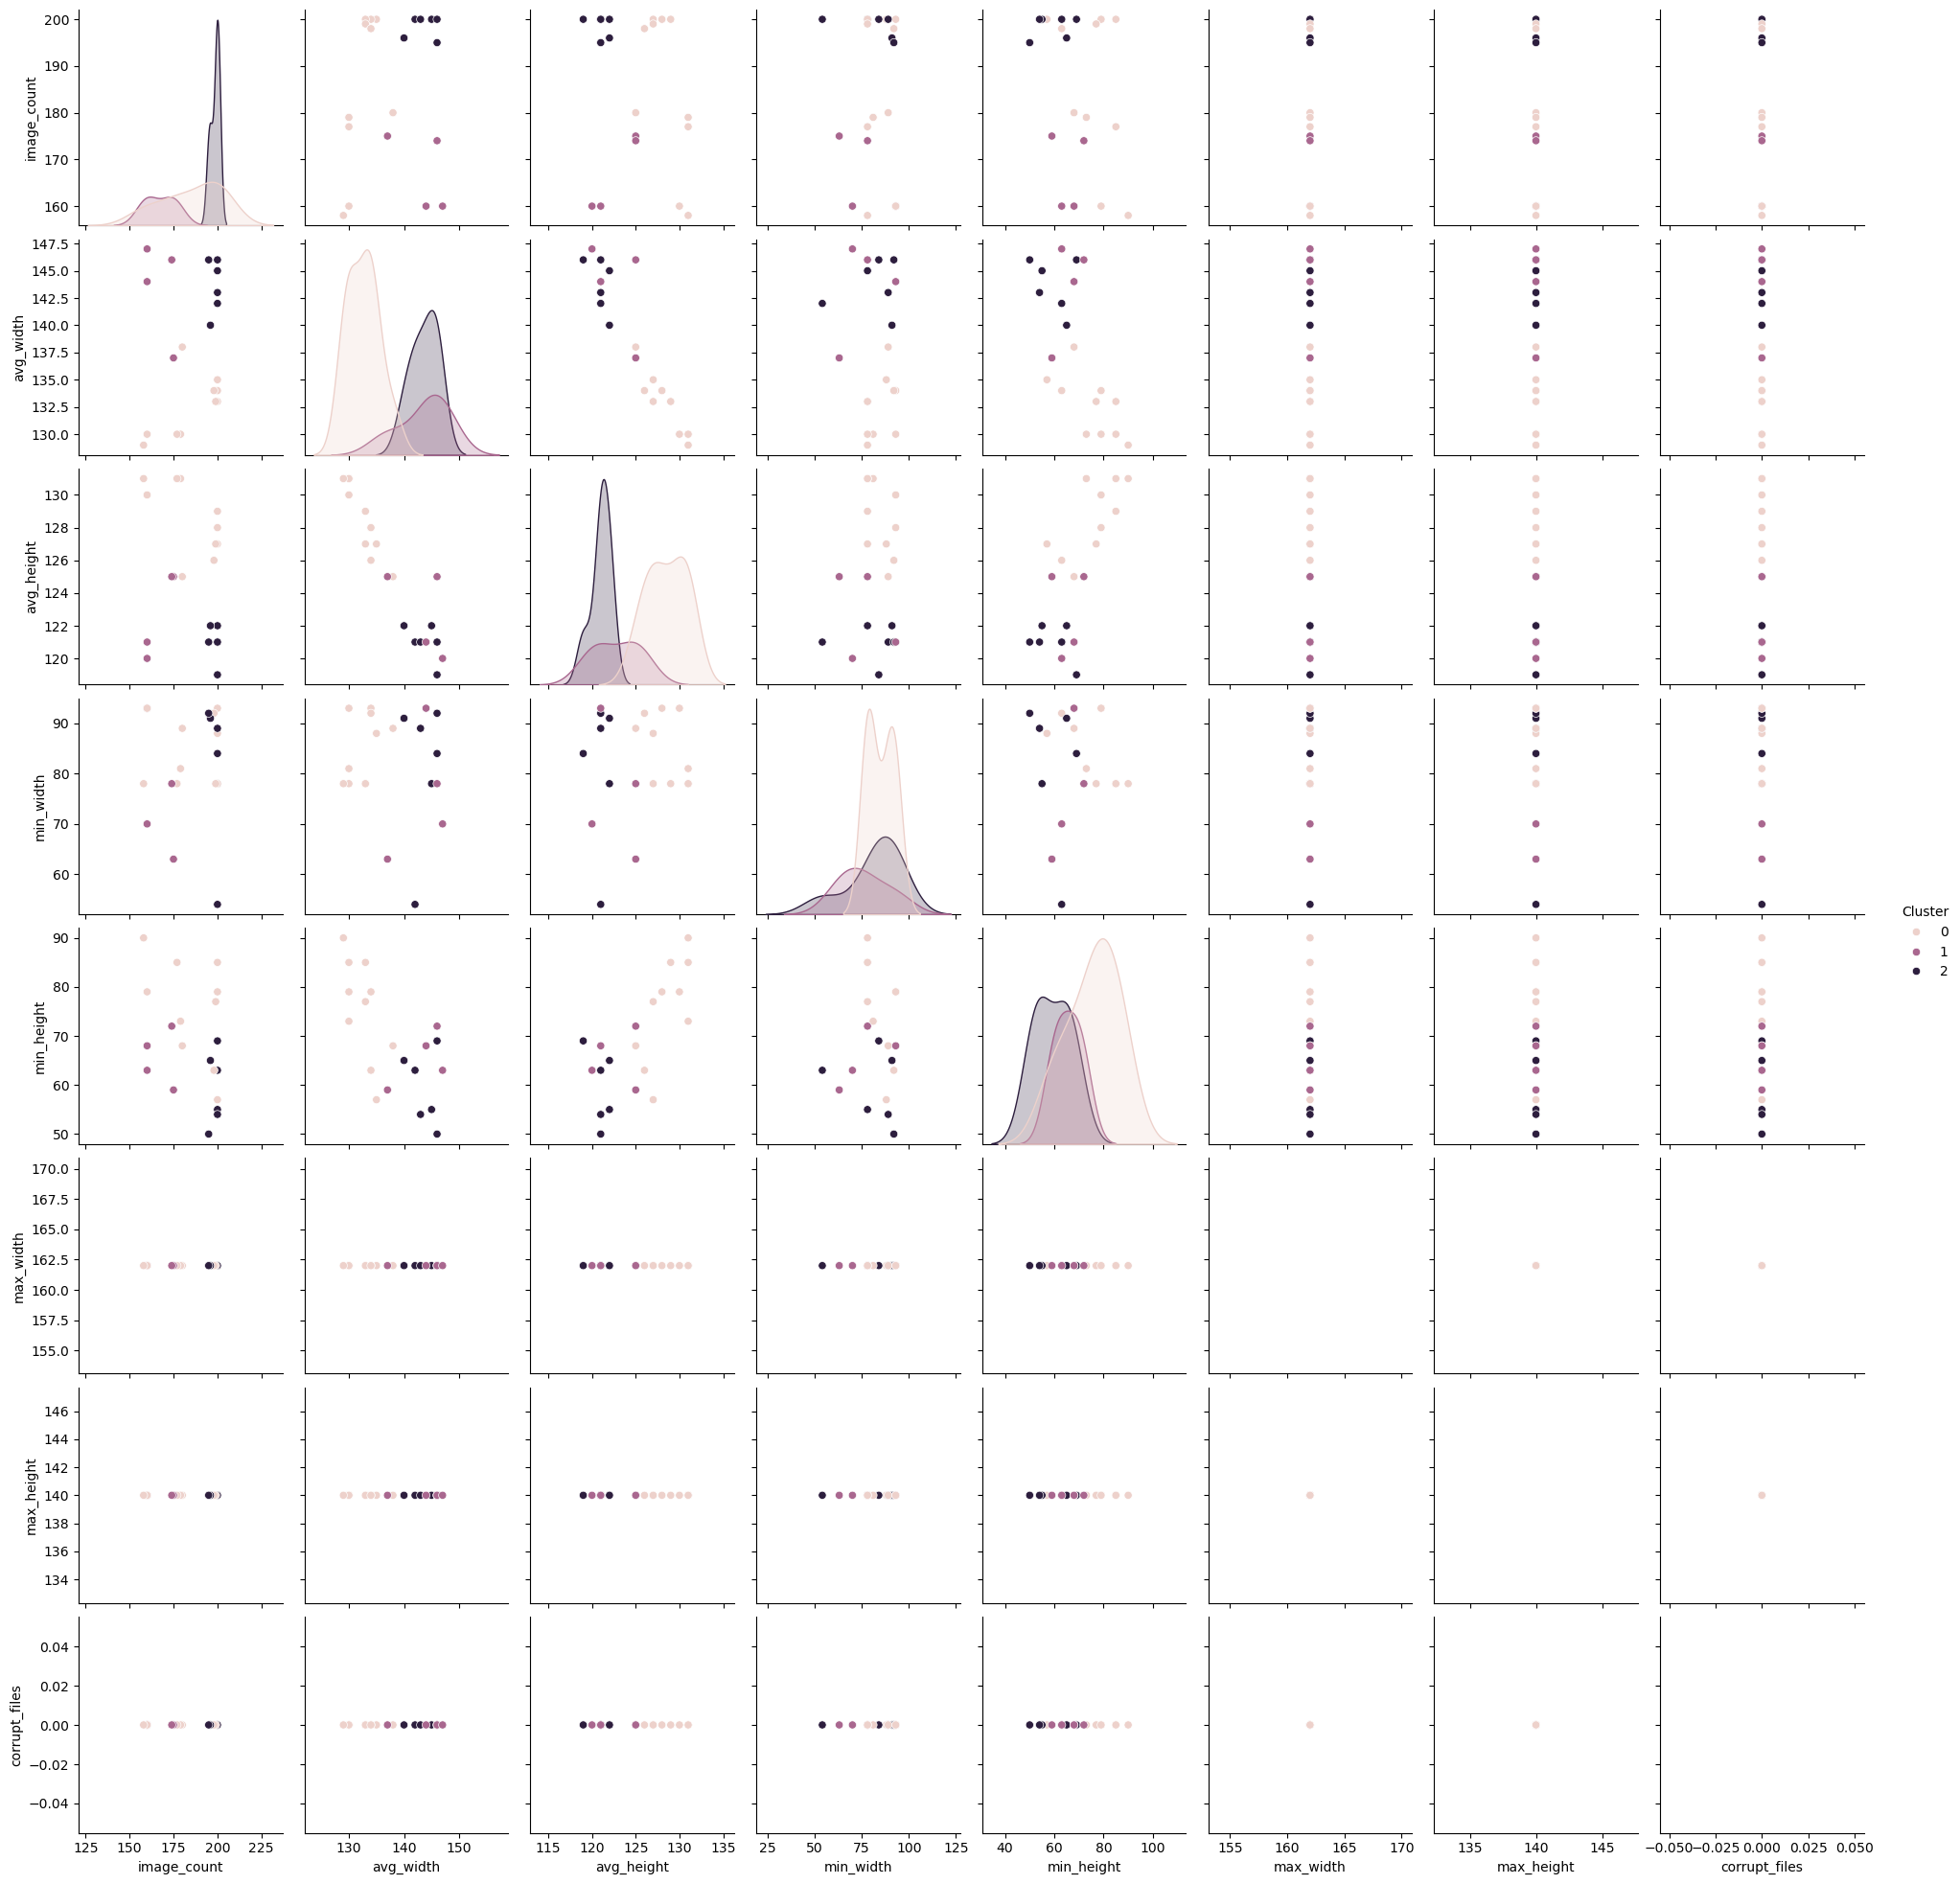

In [162]:
# Plot pairplot using scaled features and cluster labels
sns.pairplot(df_scaled, vars=X.columns, hue='Cluster')
plt.show()

In [164]:
# Analyze mean values of features per cluster
cluster_centroids = df_scaled.groupby('Cluster')[X.columns].mean()
print(cluster_centroids)

         image_count   avg_width  avg_height  min_width  min_height  \
Cluster                                                               
0             185.10  132.600000      128.50  84.800000   75.600000   
1             167.25  143.500000      122.75  76.000000   65.500000   
2             198.50  143.666667      121.00  81.333333   59.333333   

         max_width  max_height  corrupt_files  
Cluster                                        
0            162.0       140.0            0.0  
1            162.0       140.0            0.0  
2            162.0       140.0            0.0  


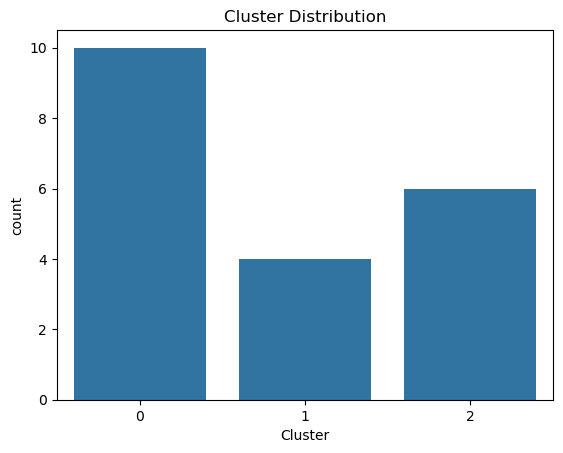

In [166]:
#Visualize cluster size distribution
sns.countplot(x='Cluster', data=df_scaled)
plt.title("Cluster Distribution")
plt.show()

In [ ]:
# 5: Optional — Evaluate Clustering

C:\Users\ANUSHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ANUSHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ANUSHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ANUSHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

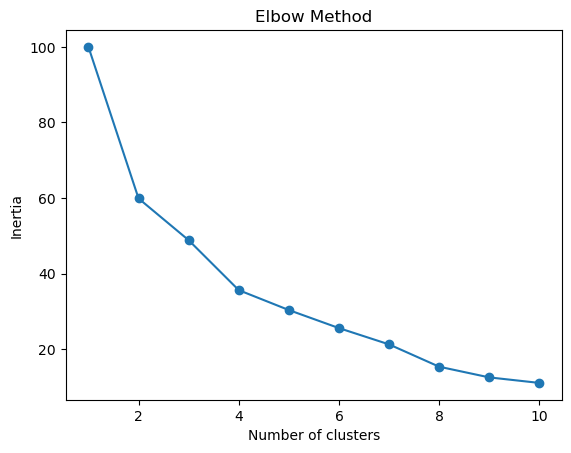

In [168]:
from sklearn.cluster import KMeans
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [170]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, df_scaled['Cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.269
